Astrobotany project: Finding patterns from space data using statistical method

So far, from first milestone of the project, objective of the project(name of the project) was defined with help from Choi et.al paper. Then, data exploration was done with BRIC19 data by using R. Few of concerns and possible suggestions with data was discussed. Possible statistical method such as unsupervised learning(e.g. clustering) and deep learning(e.g. NLP based neural networks) was suggested.
After formal discussion with first milestone that I have done, it is decided that new data from NASA Gene lab GLDS-120 will be used to perform the analysis. Therefore, process that was done with first mileston, such as, data preprocessing and data exploration will be performed again before building the main model. This time Python will be used for the analysis.

Study Description of GLDS-120: 

Experimentation on the International Space Station has reached the stage where repeated and nuanced transcriptome studies are beginning to illuminate the **structural and metabolic differences between plants grown in space compared to plants on the Earth.** 

Genes that are important in setting up the spaceflight responses are being identified; their role in spaceflight physiological adaptation are increasingly understood, and the fact that different genotypes adapt differently is recognized. However, the basic question of whether these spaceflight responses are required for survival has yet to be posed, and the fundamental notion that spaceflight responses may be non-adaptive has yet to be explored.
Therefore the experiments presented here were designed to ask **if portions of the plant spaceflight response can be genetically removed without causing loss of spaceflight survival and without causing increased stress responses.**

The CARA experiment compared the spaceflight transcriptome responses of two Arabidopsis ecotypes, Col-0 and WS, as well as that of a PhyD mutant of Col-0. When grown with the ambient light of the ISS, phyD displayed a significantly reduced spaceflight transcriptome response compared to Col-0, **suggesting that altering the activity of a single gene can actually improve spaceflight adaptation by reducing the transcriptome cost of physiological adaptation.** The WS genotype showed an even simpler spaceflight transcriptome response in the ambient light of the ISS, more **broadly indicating that the plant genotype can be manipulated to reduce the transcriptome cost of plant physiological adaptation to spaceflight and suggesting that genetic manipulation might further reduce, or perhaps eliminate the metabolic cost of spaceflight adaptation.** 

When plants were germinated and then left in the dark on the ISS, the WS genotype actually mounted a larger transcriptome response than Col-0, suggesting that the in-space light environment affects physiological adaptation, which further **implies that manipulating the local habitat can also substantially impact the metabolic cost of spaceflight adaptation**.

'Normalized_counts' data from GLDS-120 will be mainly used and  'Array_Genediff_pilot','RNAseq_Genediff_pilot' and 'RNAseq_Isoformsdiff_pilot' will be used as supplemantary data. 

Objective of this project will be remained same:
Finding patterns from space data using statistical method

In [1]:
%load_ext watermark
%watermark -a 'Alex-Seo' -v -p matplotlib,numpy,pandas

Author: Alex-Seo

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

matplotlib: 3.6.1
numpy     : 1.23.2
pandas    : 1.5.0



In [2]:
#Data Exploration
import pandas as pd
import numpy as np
import random as rnd

# visualization
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
nc_all = pd.read_csv("GLDS-120_rna_seq_Normalized_Counts.csv")
nc_all.rename( columns={'Unnamed: 0' :'RNA_seq'}, inplace=True )

In [63]:
#Summary
nc_all.head()
#print(nc_all.columns.values)
#nc_all.describe(include='all')

,RNA_seq,Atha_Col-0_root_GC_Alight_Rep1_GSM2493759_Day13,Atha_Col-0_root_GC_Alight_Rep2_GSM2493760_Day13,Atha_Ws_root_GC_Alight_Rep1_GSM2493762_Day13,Atha_Ws_root_GC_Alight_Rep2_GSM2493763_Day13,Atha_Ws_root_GC_Alight_Rep3_GSM2493764_Day13,Atha_Col-0-PhyD_root_GC_Alight_Rep1_GSM2493765_Day13,Atha_Col-0-PhyD_root_GC_Alight_Rep2_GSM2493766_Day13,Atha_Col-0-PhyD_root_GC_Alight_Rep3_GSM2493767_Day13,Atha_Col-0_root_GC_dark_Rep1_GSM2493768_Day13,...,Atha_Col-0_root_FLT_dark_Rep1_GSM2493786_Day13,Atha_Col-0_root_FLT_dark_Rep2_GSM2493787_Day13,Atha_Col-0_root_FLT_dark_Rep3_GSM2493788_Day13,Atha_Ws_root_FLT_dark_Rep1_GSM2493789_Day13,Atha_Ws_root_FLT_dark_Rep2_GSM2493790_Day13,Atha_Ws_root_FLT_dark_Rep3_GSM2493791_Day13,Atha_Col-0-PhyD_root_FLT_dark_Rep1_GSM2493792_Day13,Atha_Col-0-PhyD_root_FLT_dark_Rep2_GSM2493793_Day13,Atha_Col-0-PhyD_root_FLT_dark_Rep3_GSM2493794_Day13,Atha_Col-0_root_GC_Alight_Rep3_GSM2493761_Day13
0,AT1G01010,114.903911,138.527045,120.029155,264.939077,191.422436,242.522087,412.252180,210.848379,144.663018,...,424.846381,147.993850,277.181771,115.873687,309.807212,320.965086,398.108571,104.632768,85.671819,105.631417
1,AT1G01020,673.520214,621.787935,645.973410,439.206255,522.399132,748.231809,537.976709,739.321906,656.624218,...,463.444481,713.777447,961.748406,496.329434,569.702452,454.006600,581.378782,749.909700,688.502365,559.369964
2,AT1G01030,94.042640,95.539845,65.274146,104.723718,86.286273,104.828792,189.926908,141.970875,82.425128,...,49.956995,80.949832,162.368184,43.760519,105.956723,136.694433,97.235756,182.950314,249.211228,124.973489
3,AT1G01040,164.879471,94.034860,238.634954,132.560091,182.119577,175.683014,205.564589,131.057948,171.804526,...,83.333415,156.583395,101.028382,234.969195,209.745900,350.824499,155.614497,161.054124,189.723903,108.130784
4,AT1G01046,0.000000,0.000000,0.000000,0.000000,5.052547,0.000000,2.427178,0.000000,0.829730,...,1.393110,0.000000,0.000000,0.000000,0.000000,0.000000,0.988610,0.000000,0.000000,1.004729


In [66]:
# Reorder columns
nc_all=nc_all[['RNA_seq', 'Atha_Col-0_root_FLT_Alight_Rep1_GSM2493777_Day13',
        'Atha_Col-0_root_FLT_Alight_Rep2_GSM2493778_Day13',
        'Atha_Col-0_root_FLT_Alight_Rep3_GSM2493779_Day13',
        'Atha_Col-0_root_FLT_dark_Rep1_GSM2493786_Day13',
        'Atha_Col-0_root_FLT_dark_Rep2_GSM2493787_Day13',
        'Atha_Col-0_root_FLT_dark_Rep3_GSM2493788_Day13',
       'Atha_Col-0_root_GC_Alight_Rep1_GSM2493759_Day13',
       'Atha_Col-0_root_GC_Alight_Rep2_GSM2493760_Day13',
       'Atha_Col-0_root_GC_Alight_Rep3_GSM2493761_Day13',
       'Atha_Col-0_root_GC_dark_Rep1_GSM2493768_Day13',
       'Atha_Col-0_root_GC_dark_Rep2_GSM2493769_Day13',
       'Atha_Col-0_root_GC_dark_Rep3_GSM2493770_Day13',
       'Atha_Col-0-PhyD_root_FLT_Alight_Rep1_GSM2493783_Day13',
       'Atha_Col-0-PhyD_root_FLT_Alight_Rep2_GSM2493784_Day13',
       'Atha_Col-0-PhyD_root_FLT_Alight_Rep3_GSM2493785_Day13',
       'Atha_Col-0-PhyD_root_FLT_dark_Rep1_GSM2493792_Day13',
       'Atha_Col-0-PhyD_root_FLT_dark_Rep2_GSM2493793_Day13',
       'Atha_Col-0-PhyD_root_FLT_dark_Rep3_GSM2493794_Day13',
       'Atha_Col-0-PhyD_root_GC_Alight_Rep1_GSM2493765_Day13',
       'Atha_Col-0-PhyD_root_GC_Alight_Rep2_GSM2493766_Day13',
       'Atha_Col-0-PhyD_root_GC_Alight_Rep3_GSM2493767_Day13',
       'Atha_Col-0-PhyD_root_GC_dark_Rep1_GSM2493774_Day13',
       'Atha_Col-0-PhyD_root_GC_dark_Rep2_GSM2493775_Day13',
       'Atha_Col-0-PhyD_root_GC_dark_Rep3_GSM2493776_Day13',
       'Atha_Ws_root_FLT_Alight_Rep1_GSM2493780_Day13',
       'Atha_Ws_root_FLT_Alight_Rep2_GSM2493781_Day13',
       'Atha_Ws_root_FLT_Alight_Rep3_GSM2493782_Day13',
       'Atha_Ws_root_FLT_dark_Rep1_GSM2493789_Day13',
       'Atha_Ws_root_FLT_dark_Rep2_GSM2493790_Day13',
       'Atha_Ws_root_FLT_dark_Rep3_GSM2493791_Day13',
       'Atha_Ws_root_GC_Alight_Rep1_GSM2493762_Day13',
       'Atha_Ws_root_GC_Alight_Rep2_GSM2493763_Day13',
       'Atha_Ws_root_GC_Alight_Rep3_GSM2493764_Day13',
       'Atha_Ws_root_GC_dark_Rep1_GSM2493771_Day13',
       'Atha_Ws_root_GC_dark_Rep2_GSM2493772_Day13',
       'Atha_Ws_root_GC_dark_Rep3_GSM2493773_Day13']]

### Dividing it by all possible stressors

In [67]:
###Data reconstruction, Make more variables and set the output(Y) variable
###You can not use melt() from pandas since there are 3 rep for each segment

###replicate each row 12 times for same RNA_seq
newnc = pd.DataFrame(np.repeat(nc_all.values,12,axis=0))
#newnc.colums = nc_all.columns

###Create Genotype variable
GT = pd.DataFrame(
{"Genotype" : ['col0', 'col0','col0','col0',
               'phyD', 'phyD', 'phyD', 'phyD',
               'WS', 'WS', 'WS', 'WS']})
GT = pd.concat([GT]*len(nc_all)).reset_index().drop(columns=['index'])

###Create Light setting variable

LS = pd.DataFrame(
{"Light_Setting" : ['Light' ,'Dark']})
LS = pd.concat([LS]*6*len(nc_all)).reset_index().drop(columns=['index'])

###create Location variable
LC = pd.DataFrame(
{"Location" : ['FLT' ,'FLT', 'GC', 'GC']})
LC = pd.concat([LC]*3*len(nc_all)).reset_index().drop(columns=['index'])

###Transpose fpkm values (3 values)
ncworna = nc_all.drop(columns = ['RNA_seq'])
D = pd.DataFrame(columns=['Rep1', 'Rep2', 'Rep3'])

for i in range(len(ncworna)):
    s = pd.Series(ncworna.iloc[i]) #Make each row a pandas series
    a = np.reshape(s.to_numpy(),(12,3)) #Change Series to numpy and reshape it
    #Make each reshaped arrays into dataframe, this one dataframe represent one RNA sequence
    d = pd.DataFrame(a, columns=['Rep1', 'Rep2', 'Rep3'])
    D = pd.concat([D,d]) #concat each dataframe

D = D.reset_index().drop(columns=['index'])#Reset index
###Add and drop variables
newnc = newnc.drop(columns=range(1,37))

newnc["Genotype"] = GT
newnc["Light_Setting"] = LS

newnc = pd.concat([newnc, D], axis = 1)

newnc["Location"] = LC

#Rename column
newnc = newnc.rename(columns = {0 : "RNA_seq"})
#Overview of newly constructed dataset
newnc.head()

,RNA_seq,Genotype,Light_Setting,Rep1,Rep2,Rep3,Location
0,AT1G01010,col0,Light,247.594834,221.299634,328.875256,FLT
1,AT1G01010,col0,Dark,424.846381,147.993850,277.181771,FLT
2,AT1G01010,col0,Light,114.903911,138.527045,105.631417,GC
3,AT1G01010,col0,Dark,144.663018,201.741865,285.221585,GC
4,AT1G01010,phyD,Light,253.884065,275.393343,486.247724,FLT


In [147]:
#Applying models using newly constructed labeled dataset

#Label Encoding - One hot encoding on categorical predictors for modeling purpose
ncwd = pd.get_dummies(newnc, columns = ["Genotype"],drop_first =True)
#ncwd = pd.get_dummies(ncwd, columns = ['Light_Setting'])

clean_light = {"Light_Setting": {"Light": 1, "Dark": 0}}
clean_target = {"Location": {"FLT": 1, "GC": 0}}
ncwd.replace(clean_target, inplace = True)
ncwd.replace(clean_light, inplace = True)

#ncwd.head()

## 3 continuous feature, 3 dummy varables

In [148]:
ncwd= ncwd[['RNA_seq','Rep1', 'Rep2', 'Rep3', 'Light_Setting',
       'Genotype_col0', 'Genotype_phyD', 'Location']]

In [171]:
ncwd.head()

,RNA_seq,Rep1,Rep2,Rep3,Light_Setting,Genotype_col0,Genotype_phyD,Location
0,AT1G01010,247.594834,221.299634,328.875256,1,1,0,1
1,AT1G01010,424.846381,147.993850,277.181771,0,1,0,1
2,AT1G01010,114.903911,138.527045,105.631417,1,1,0,0
3,AT1G01010,144.663018,201.741865,285.221585,0,1,0,0
4,AT1G01010,253.884065,275.393343,486.247724,1,0,1,1


### Dividing it by Gravity and Genotype not considering Light as variable

In [163]:
###Data reconstruction, Make more variables and set the output(Y) variable
###You can not use melt() from pandas since there are 3 rep for each segment

###replicate each row 12 times for same RNA_seq
newnc = pd.DataFrame(np.repeat(nc_all.values,6,axis=0))
#newnc.colums = nc_all.columns

###Create Genotype variable
GT = pd.DataFrame(
{"Genotype" : ['col0', 'col0',
               'phyD', 'phyD', 
               'WS', 'WS']})
GT = pd.concat([GT]*len(nc_all)).reset_index().drop(columns=['index'])


###create Location variable
LC = pd.DataFrame(
{"Location" : ['FLT', 'GC']})
LC = pd.concat([LC]*3*len(nc_all)).reset_index().drop(columns=['index'])

###Transpose fpkm values (3 values)
ncworna = nc_all.drop(columns = ['RNA_seq'])
D = pd.DataFrame(columns=['Rep1_l', 'Rep2_l', 'Rep3_l',
                         'Rep1_d', 'Rep2_d', 'Rep3_d'])

for i in range(len(ncworna)):
    s = pd.Series(ncworna.iloc[i]) #Make each row a pandas series
    a = np.reshape(s.to_numpy(),(6,6)) #Change Series to numpy and reshape it
    #Make each reshaped arrays into dataframe, this one dataframe represent one RNA sequence
    d = pd.DataFrame(a, columns=['Rep1_l', 'Rep2_l', 'Rep3_l',
                                 'Rep1_d', 'Rep2_d', 'Rep3_d'])
    D = pd.concat([D,d]) #concat each dataframe

D = D.reset_index().drop(columns=['index'])#Reset index
###Add and drop variables
newnc = newnc.drop(columns=range(1,37))

newnc["Genotype"] = GT

newnc = pd.concat([newnc, D], axis = 1)

newnc["Location"] = LC

#Rename column
newnc = newnc.rename(columns = {0 : "RNA_seq"})
#Overview of newly constructed dataset
newnc.head()

,RNA_seq,Genotype,Rep1_l,Rep2_l,Rep3_l,Rep1_d,Rep2_d,Rep3_d,Location
0,AT1G01010,col0,247.594834,221.299634,328.875256,424.846381,147.993850,277.181771,FLT
1,AT1G01010,col0,114.903911,138.527045,105.631417,144.663018,201.741865,285.221585,GC
2,AT1G01010,phyD,253.884065,275.393343,486.247724,398.108571,104.632768,85.671819,FLT
3,AT1G01010,phyD,242.522087,412.252180,210.848379,355.864675,190.024910,319.742539,GC
4,AT1G01010,WS,204.291408,183.830544,194.349657,115.873687,309.807212,320.965086,FLT


In [164]:
#Applying models using newly constructed labeled dataset

#Label Encoding - One hot encoding on categorical predictors for modeling purpose
ncwd2 = pd.get_dummies(newnc, columns = ["Genotype"],drop_first =True)
#ncwd = pd.get_dummies(ncwd, columns = ['Light_Setting'])

#clean_light = {"Light_Setting": {"Light": 1, "Dark": 0}}
clean_target = {"Location": {"FLT": 1, "GC": 0}}
ncwd2.replace(clean_target, inplace = True)
#ncwd.replace(clean_light, inplace = True)

#ncwd.head()

## 3 continuous feature, 3 dummy varables

In [169]:
ncwd2= ncwd2[['RNA_seq','Rep1_l', 'Rep2_l', 'Rep3_l', 'Rep1_d', 'Rep2_d', 'Rep3_d', 
       'Genotype_col0', 'Genotype_phyD', 'Location']]

In [170]:
ncwd2.head()

,RNA_seq,Rep1_l,Rep2_l,Rep3_l,Rep1_d,Rep2_d,Rep3_d,Genotype_col0,Genotype_phyD,Location
0,AT1G01010,247.594834,221.299634,328.875256,424.846381,147.993850,277.181771,1,0,1
1,AT1G01010,114.903911,138.527045,105.631417,144.663018,201.741865,285.221585,1,0,0
2,AT1G01010,253.884065,275.393343,486.247724,398.108571,104.632768,85.671819,0,1,1
3,AT1G01010,242.522087,412.252180,210.848379,355.864675,190.024910,319.742539,0,1,0
4,AT1G01010,204.291408,183.830544,194.349657,115.873687,309.807212,320.965086,0,0,1


In [ ]:
## 6 continuous variables, 2 dummy variable

### Dividing it by Gravity and Light: not considering Genotype as variable

In [174]:
# Reorder columns
nc_all2=nc_all[['RNA_seq', 'Atha_Col-0_root_FLT_Alight_Rep1_GSM2493777_Day13',
                'Atha_Col-0_root_FLT_Alight_Rep2_GSM2493778_Day13',
                'Atha_Col-0_root_FLT_Alight_Rep3_GSM2493779_Day13',
                'Atha_Col-0-PhyD_root_FLT_Alight_Rep1_GSM2493783_Day13',
                'Atha_Col-0-PhyD_root_FLT_Alight_Rep2_GSM2493784_Day13',
                'Atha_Col-0-PhyD_root_FLT_Alight_Rep3_GSM2493785_Day13',
                'Atha_Ws_root_FLT_Alight_Rep1_GSM2493780_Day13',
                'Atha_Ws_root_FLT_Alight_Rep2_GSM2493781_Day13',
                'Atha_Ws_root_FLT_Alight_Rep3_GSM2493782_Day13',
                'Atha_Col-0_root_FLT_dark_Rep1_GSM2493786_Day13',
                'Atha_Col-0_root_FLT_dark_Rep2_GSM2493787_Day13',
                'Atha_Col-0_root_FLT_dark_Rep3_GSM2493788_Day13',
                'Atha_Col-0-PhyD_root_FLT_dark_Rep1_GSM2493792_Day13',
                'Atha_Col-0-PhyD_root_FLT_dark_Rep2_GSM2493793_Day13',
                'Atha_Col-0-PhyD_root_FLT_dark_Rep3_GSM2493794_Day13',
                'Atha_Ws_root_FLT_dark_Rep1_GSM2493789_Day13',
                   'Atha_Ws_root_FLT_dark_Rep2_GSM2493790_Day13',
                   'Atha_Ws_root_FLT_dark_Rep3_GSM2493791_Day13',
                'Atha_Col-0_root_GC_Alight_Rep1_GSM2493759_Day13',
                   'Atha_Col-0_root_GC_Alight_Rep2_GSM2493760_Day13',
                   'Atha_Col-0_root_GC_Alight_Rep3_GSM2493761_Day13',
                'Atha_Col-0-PhyD_root_GC_Alight_Rep1_GSM2493765_Day13',
                   'Atha_Col-0-PhyD_root_GC_Alight_Rep2_GSM2493766_Day13',
                   'Atha_Col-0-PhyD_root_GC_Alight_Rep3_GSM2493767_Day13',
                                   'Atha_Ws_root_GC_Alight_Rep1_GSM2493762_Day13',
                   'Atha_Ws_root_GC_Alight_Rep2_GSM2493763_Day13',
                   'Atha_Ws_root_GC_Alight_Rep3_GSM2493764_Day13',
                   'Atha_Col-0_root_GC_dark_Rep1_GSM2493768_Day13',
                   'Atha_Col-0_root_GC_dark_Rep2_GSM2493769_Day13',
                   'Atha_Col-0_root_GC_dark_Rep3_GSM2493770_Day13',
                   'Atha_Col-0-PhyD_root_GC_dark_Rep1_GSM2493774_Day13',
                   'Atha_Col-0-PhyD_root_GC_dark_Rep2_GSM2493775_Day13',
                   'Atha_Col-0-PhyD_root_GC_dark_Rep3_GSM2493776_Day13',
                'Atha_Ws_root_GC_dark_Rep1_GSM2493771_Day13',
                   'Atha_Ws_root_GC_dark_Rep2_GSM2493772_Day13',
                   'Atha_Ws_root_GC_dark_Rep3_GSM2493773_Day13']]

In [186]:
###Data reconstruction, Make more variables and set the output(Y) variable
###You can not use melt() from pandas since there are 3 rep for each segment

###replicate each row 12 times for same RNA_seq
newnc = pd.DataFrame(np.repeat(nc_all2.values,4,axis=0))
#newnc.colums = nc_all.columns

###Create Light setting variable

LS = pd.DataFrame(
{"Light_Setting" : ['Light' ,'Dark']})
LS = pd.concat([LS]*2*len(nc_all2)).reset_index().drop(columns=['index'])

###create Location variable
LC = pd.DataFrame(
{"Location" : ['FLT','FLT', 'GC', 'GC']})
LC = pd.concat([LC]*len(nc_all2)).reset_index().drop(columns=['index'])

###Transpose fpkm values (3 values)
ncworna = nc_all2.drop(columns = ['RNA_seq'])
D = pd.DataFrame(columns=['Rep1_c', 'Rep2_c', 'Rep3_c',
                         'Rep1_p', 'Rep2_p', 'Rep3_p',
                         'Rep1_w', 'Rep2_w', 'Rep3_w'])

for i in range(len(ncworna)):
    s = pd.Series(ncworna.iloc[i]) #Make each row a pandas series
    a = np.reshape(s.to_numpy(),(4,9)) #Change Series to numpy and reshape it
    #Make each reshaped arrays into dataframe, this one dataframe represent one RNA sequence
    d = pd.DataFrame(a, columns=['Rep1_c', 'Rep2_c', 'Rep3_c',
                         'Rep1_p', 'Rep2_p', 'Rep3_p',
                         'Rep1_w', 'Rep2_w', 'Rep3_w'])
    D = pd.concat([D,d]) #concat each dataframe

D = D.reset_index().drop(columns=['index'])#Reset index
###Add and drop variables
newnc = newnc.drop(columns=range(1,37))

newnc["Light_Setting"] = LS

newnc = pd.concat([newnc, D], axis = 1)

newnc["Location"] = LC

#Rename column
newnc = newnc.rename(columns = {0 : "RNA_seq"})
#Overview of newly constructed dataset
newnc.head()

,RNA_seq,Light_Setting,Rep1_c,Rep2_c,Rep3_c,Rep1_p,Rep2_p,Rep3_p,Rep1_w,Rep2_w,Rep3_w,Location
0,AT1G01010,Light,247.594834,221.299634,328.875256,253.884065,275.393343,486.247724,204.291408,183.830544,194.349657,FLT
1,AT1G01010,Dark,424.846381,147.993850,277.181771,398.108571,104.632768,85.671819,115.873687,309.807212,320.965086,FLT
2,AT1G01010,Light,114.903911,138.527045,105.631417,242.522087,412.252180,210.848379,120.029155,264.939077,191.422436,GC
3,AT1G01010,Dark,144.663018,201.741865,285.221585,355.864675,190.024910,319.742539,66.843506,155.468283,198.730734,GC
4,AT1G01020,Light,582.003386,525.522545,557.716573,662.721977,620.405261,619.800417,460.643087,727.144235,531.944938,FLT


In [187]:
#Applying models using newly constructed labeled dataset

#Label Encoding - One hot encoding on categorical predictors for modeling purpose
#ncwd3 = pd.get_dummies(newnc, columns = ["Genotype"],drop_first =True)
#ncwd3 = pd.get_dummies(ncwd, columns = ['Light_Setting'])
ncwd3 = newnc
clean_light = {"Light_Setting": {"Light": 1, "Dark": 0}}
clean_target = {"Location": {"FLT": 1, "GC": 0}}
ncwd3.replace(clean_target, inplace = True)
ncwd3.replace(clean_light, inplace = True)

#ncwd.head()

In [188]:
ncwd3= ncwd3[['RNA_seq','Rep1_c', 'Rep2_c', 'Rep3_c', 'Rep1_p', 'Rep2_p', 'Rep3_p', 'Rep1_w', 'Rep2_w', 'Rep3_w', 
              'Light_Setting', 'Location']]

In [189]:
ncwd3.head()

,RNA_seq,Rep1_c,Rep2_c,Rep3_c,Rep1_p,Rep2_p,Rep3_p,Rep1_w,Rep2_w,Rep3_w,Light_Setting,Location
0,AT1G01010,247.594834,221.299634,328.875256,253.884065,275.393343,486.247724,204.291408,183.830544,194.349657,1,1
1,AT1G01010,424.846381,147.993850,277.181771,398.108571,104.632768,85.671819,115.873687,309.807212,320.965086,0,1
2,AT1G01010,114.903911,138.527045,105.631417,242.522087,412.252180,210.848379,120.029155,264.939077,191.422436,1,0
3,AT1G01010,144.663018,201.741865,285.221585,355.864675,190.024910,319.742539,66.843506,155.468283,198.730734,0,0
4,AT1G01020,582.003386,525.522545,557.716573,662.721977,620.405261,619.800417,460.643087,727.144235,531.944938,1,1


In [ ]:
## 9 continuous variables, 1 dummy variable

### Dividing it by Gravity: not considering Genotype, Light as variable

In [196]:
###Data reconstruction, Make more variables and set the output(Y) variable
###You can not use melt() from pandas since there are 3 rep for each segment

###replicate each row 12 times for same RNA_seq
newnc = pd.DataFrame(np.repeat(nc_all2.values,2,axis=0))
#newnc.colums = nc_all.columns

###Create Light setting variable

###create Location variable
LC = pd.DataFrame(
{"Location" : ['FLT', 'GC']})
LC = pd.concat([LC]*len(nc_all2)).reset_index().drop(columns=['index'])

###Transpose fpkm values (3 values)
ncworna = nc_all2.drop(columns = ['RNA_seq'])
D = pd.DataFrame(columns=['Rep1_c_l', 'Rep2_c_l', 'Rep3_c_l',
                         'Rep1_p_l', 'Rep2_p_l', 'Rep3_p_l',
                         'Rep1_w_l', 'Rep2_w_l', 'Rep3_w_l',
                         'Rep1_c_d', 'Rep2_c_d', 'Rep3_c_d',
                         'Rep1_p_d', 'Rep2_p_d', 'Rep3_p_d',
                         'Rep1_w_d', 'Rep2_w_d', 'Rep3_w_d'])

for i in range(len(ncworna)):
    s = pd.Series(ncworna.iloc[i]) #Make each row a pandas series
    a = np.reshape(s.to_numpy(),(2,18)) #Change Series to numpy and reshape it
    #Make each reshaped arrays into dataframe, this one dataframe represent one RNA sequence
    d = pd.DataFrame(a, columns=['Rep1_c_l', 'Rep2_c_l', 'Rep3_c_l',
                         'Rep1_p_l', 'Rep2_p_l', 'Rep3_p_l',
                         'Rep1_w_l', 'Rep2_w_l', 'Rep3_w_l',
                         'Rep1_c_d', 'Rep2_c_d', 'Rep3_c_d',
                         'Rep1_p_d', 'Rep2_p_d', 'Rep3_p_d',
                         'Rep1_w_d', 'Rep2_w_d', 'Rep3_w_d'])
    D = pd.concat([D,d]) #concat each dataframe

D = D.reset_index().drop(columns=['index'])#Reset index
###Add and drop variables
newnc = newnc.drop(columns=range(1,37))

newnc["Location"] = LC

newnc = pd.concat([newnc, D], axis = 1)


#Rename column
newnc = newnc.rename(columns = {0 : "RNA_seq"})
#Overview of newly constructed dataset
newnc.head()

,RNA_seq,Location,Rep1_c_l,Rep2_c_l,Rep3_c_l,Rep1_p_l,Rep2_p_l,Rep3_p_l,Rep1_w_l,Rep2_w_l,Rep3_w_l,Rep1_c_d,Rep2_c_d,Rep3_c_d,Rep1_p_d,Rep2_p_d,Rep3_p_d,Rep1_w_d,Rep2_w_d,Rep3_w_d
0,AT1G01010,FLT,247.594834,221.299634,328.875256,253.884065,275.393343,486.247724,204.291408,183.830544,194.349657,424.846381,147.993850,277.181771,398.108571,104.632768,85.671819,115.873687,309.807212,320.965086
1,AT1G01010,GC,114.903911,138.527045,105.631417,242.522087,412.252180,210.848379,120.029155,264.939077,191.422436,144.663018,201.741865,285.221585,355.864675,190.024910,319.742539,66.843506,155.468283,198.730734
2,AT1G01020,FLT,582.003386,525.522545,557.716573,662.721977,620.405261,619.800417,460.643087,727.144235,531.944938,463.444481,713.777447,961.748406,581.378782,749.909700,688.502365,496.329434,569.702452,454.006600
3,AT1G01020,GC,673.520214,621.787935,559.369964,748.231809,537.976709,739.321906,645.973410,439.206255,522.399132,656.624218,627.928204,633.934741,666.197531,630.215736,621.323888,488.282906,517.722067,516.581267
4,AT1G01030,FLT,64.785419,54.875704,110.764910,42.589529,58.928829,85.041329,74.235930,153.874754,83.046646,49.956995,80.949832,162.368184,97.235756,182.950314,249.211228,43.760519,105.956723,136.694433


In [197]:
#Applying models using newly constructed labeled dataset

#Label Encoding - One hot encoding on categorical predictors for modeling purpose
#ncwd3 = pd.get_dummies(newnc, columns = ["Genotype"],drop_first =True)
#ncwd3 = pd.get_dummies(ncwd, columns = ['Light_Setting'])
ncwd4 = newnc
clean_target = {"Location": {"FLT": 1, "GC": 0}}
ncwd4.replace(clean_target, inplace = True)

#ncwd.head()

In [198]:
ncwd4= ncwd4[['RNA_seq','Rep1_c_l', 'Rep2_c_l', 'Rep3_c_l', 'Rep1_p_l', 'Rep2_p_l', 'Rep3_p_l', 'Rep1_w_l', 'Rep2_w_l', 'Rep3_w_l', 
              'Rep1_c_d', 'Rep2_c_d', 'Rep3_c_d', 'Rep1_p_d', 'Rep2_p_d', 'Rep3_p_d', 'Rep1_w_d', 'Rep2_w_d', 'Rep3_w_d','Location']]

In [199]:
ncwd4.head()

,RNA_seq,Rep1_c_l,Rep2_c_l,Rep3_c_l,Rep1_p_l,Rep2_p_l,Rep3_p_l,Rep1_w_l,Rep2_w_l,Rep3_w_l,Rep1_c_d,Rep2_c_d,Rep3_c_d,Rep1_p_d,Rep2_p_d,Rep3_p_d,Rep1_w_d,Rep2_w_d,Rep3_w_d,Location
0,AT1G01010,247.594834,221.299634,328.875256,253.884065,275.393343,486.247724,204.291408,183.830544,194.349657,424.846381,147.993850,277.181771,398.108571,104.632768,85.671819,115.873687,309.807212,320.965086,1
1,AT1G01010,114.903911,138.527045,105.631417,242.522087,412.252180,210.848379,120.029155,264.939077,191.422436,144.663018,201.741865,285.221585,355.864675,190.024910,319.742539,66.843506,155.468283,198.730734,0
2,AT1G01020,582.003386,525.522545,557.716573,662.721977,620.405261,619.800417,460.643087,727.144235,531.944938,463.444481,713.777447,961.748406,581.378782,749.909700,688.502365,496.329434,569.702452,454.006600,1
3,AT1G01020,673.520214,621.787935,559.369964,748.231809,537.976709,739.321906,645.973410,439.206255,522.399132,656.624218,627.928204,633.934741,666.197531,630.215736,621.323888,488.282906,517.722067,516.581267,0
4,AT1G01030,64.785419,54.875704,110.764910,42.589529,58.928829,85.041329,74.235930,153.874754,83.046646,49.956995,80.949832,162.368184,97.235756,182.950314,249.211228,43.760519,105.956723,136.694433,1


In [ ]:
## 18 continuous variables

## Classfication

In [70]:
#Pacakages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [214]:
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, mean_squared_error
from scipy.stats import spearmanr
from sklearn.model_selection import KFold

In [279]:
nc_all

,RNA_seq,Atha_Col-0_root_FLT_Alight_Rep1_GSM2493777_Day13,Atha_Col-0_root_FLT_Alight_Rep2_GSM2493778_Day13,Atha_Col-0_root_FLT_Alight_Rep3_GSM2493779_Day13,Atha_Col-0_root_FLT_dark_Rep1_GSM2493786_Day13,Atha_Col-0_root_FLT_dark_Rep2_GSM2493787_Day13,Atha_Col-0_root_FLT_dark_Rep3_GSM2493788_Day13,Atha_Col-0_root_GC_Alight_Rep1_GSM2493759_Day13,Atha_Col-0_root_GC_Alight_Rep2_GSM2493760_Day13,Atha_Col-0_root_GC_Alight_Rep3_GSM2493761_Day13,...,Atha_Ws_root_FLT_Alight_Rep3_GSM2493782_Day13,Atha_Ws_root_FLT_dark_Rep1_GSM2493789_Day13,Atha_Ws_root_FLT_dark_Rep2_GSM2493790_Day13,Atha_Ws_root_FLT_dark_Rep3_GSM2493791_Day13,Atha_Ws_root_GC_Alight_Rep1_GSM2493762_Day13,Atha_Ws_root_GC_Alight_Rep2_GSM2493763_Day13,Atha_Ws_root_GC_Alight_Rep3_GSM2493764_Day13,Atha_Ws_root_GC_dark_Rep1_GSM2493771_Day13,Atha_Ws_root_GC_dark_Rep2_GSM2493772_Day13,Atha_Ws_root_GC_dark_Rep3_GSM2493773_Day13
0,AT1G01010,247.594834,221.299634,328.875256,424.846381,147.993850,277.181771,114.903911,138.527045,105.631417,...,194.349657,115.873687,309.807212,320.965086,120.029155,264.939077,191.422436,66.843506,155.468283,198.730734
1,AT1G01020,582.003386,525.522545,557.716573,463.444481,713.777447,961.748406,673.520214,621.787935,559.369964,...,531.944938,496.329434,569.702452,454.006600,645.973410,439.206255,522.399132,488.282906,517.722067,516.581267
2,AT1G01030,64.785419,54.875704,110.764910,49.956995,80.949832,162.368184,94.042640,95.539845,124.973489,...,83.046646,43.760519,105.956723,136.694433,65.274146,104.723718,86.286273,99.396327,53.325660,83.130740
3,AT1G01040,86.649214,140.044985,169.791298,83.333415,156.583395,101.028382,164.879471,94.034860,108.130784,...,236.961275,234.969195,209.745900,350.824499,238.634954,132.560091,182.119577,203.601357,281.916762,309.972290
4,AT1G01046,0.000000,0.000000,0.803130,1.393110,0.000000,0.000000,0.000000,0.000000,1.004729,...,1.097737,0.000000,0.000000,0.000000,0.000000,0.000000,5.052547,0.788845,1.228435,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24735,ATMG01390,7052.728965,7736.715629,10139.419640,5912.203096,11868.520574,15185.699365,9743.299976,7083.498611,10034.522854,...,13072.787777,11082.113686,15237.809694,20555.282882,15144.623144,9584.118319,11308.993408,14142.573994,13416.218153,25833.332898
24736,ATMG01400,3.394096,7.359079,2.420723,1.392285,0.000000,0.966204,0.000000,0.000000,0.000000,...,0.000000,3.376722,3.352016,4.353816,3.943872,1.978902,2.339001,1.605004,11.354311,8.369905
24737,ATMG01410,4.221990,0.000000,1.620729,1.396550,2.019330,1.972982,0.905219,0.000000,0.000000,...,1.056159,3.428222,4.489684,3.355468,2.841964,2.979674,0.000000,4.903632,3.894975,0.000000
24738,ATMG09450,1.634475,0.000000,0.786066,0.000000,0.660800,1.781723,0.000000,1.228712,0.000000,...,0.000000,0.000000,1.187129,0.000000,1.196106,1.021735,0.000000,1.474076,0.000000,1.246586


In [284]:
ncwd

,RNA_seq,Rep1,Rep2,Rep3,Light_Setting,Genotype_col0,Genotype_phyD,Location
0,AT1G01010,247.594834,221.299634,328.875256,1,1,0,1
1,AT1G01010,424.846381,147.993850,277.181771,0,1,0,1
2,AT1G01010,114.903911,138.527045,105.631417,1,1,0,0
3,AT1G01010,144.663018,201.741865,285.221585,0,1,0,0
4,AT1G01010,253.884065,275.393343,486.247724,1,0,1,1
...,...,...,...,...,...,...,...,...
296875,ATMG09730,0.000000,0.727148,2.503762,0,0,1,0
296876,ATMG09730,1.873150,2.412603,0.000000,1,0,0,1
296877,ATMG09730,0.000000,1.187129,0.000000,0,0,0,1
296878,ATMG09730,1.196106,1.021735,0.000000,1,0,0,0


In [278]:
ncwd2

,RNA_seq,Rep1_l,Rep2_l,Rep3_l,Rep1_d,Rep2_d,Rep3_d,Genotype_col0,Genotype_phyD,Location
0,AT1G01010,247.594834,221.299634,328.875256,424.846381,147.993850,277.181771,1,0,1
1,AT1G01010,114.903911,138.527045,105.631417,144.663018,201.741865,285.221585,1,0,0
2,AT1G01010,253.884065,275.393343,486.247724,398.108571,104.632768,85.671819,0,1,1
3,AT1G01010,242.522087,412.252180,210.848379,355.864675,190.024910,319.742539,0,1,0
4,AT1G01010,204.291408,183.830544,194.349657,115.873687,309.807212,320.965086,0,0,1
...,...,...,...,...,...,...,...,...,...,...
148435,ATMG09730,0.000000,1.228712,0.000000,0.000000,0.000000,0.995141,1,0,0
148436,ATMG09730,0.000000,0.669621,0.898638,0.000000,3.012912,0.000000,0,1,1
148437,ATMG09730,1.219910,0.000000,0.961777,0.000000,0.727148,2.503762,0,1,0
148438,ATMG09730,1.873150,2.412603,0.000000,0.000000,1.187129,0.000000,0,0,1


In [272]:
#Model 1 - Start with a basics: Since the target variables are binary, Apply Logistic Regression for classification
X = ncwd4.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = ncwd4['Location'].values

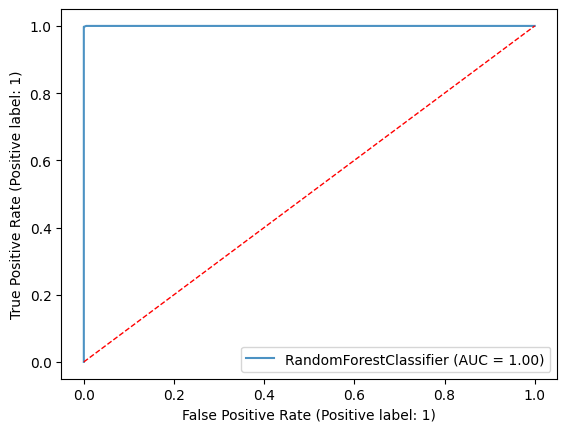

Confusion Matrix for Training data:

[[19813     0]
 [   46 19725]]

Misclassification rate: 0.001162085691188359

Out of Bag error: 0.13154304769603875

Train accuracy: 99.88379143088116


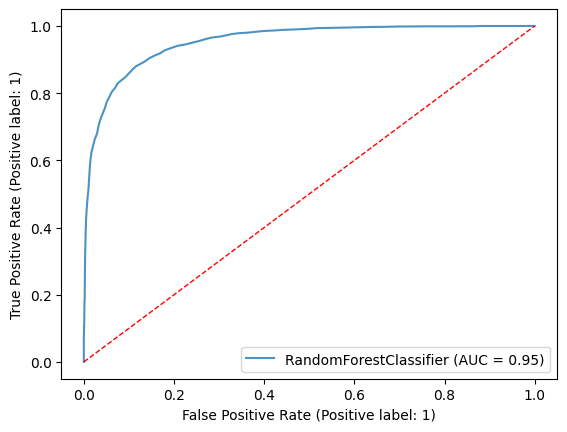

Confusion Matrix for Training data:

[[4355  572]
 [ 595 4374]]

Misclassification rate: 0.11792643492320129

Out of Bag error: 0.13154304769603875

Test error: 88.20735650767986


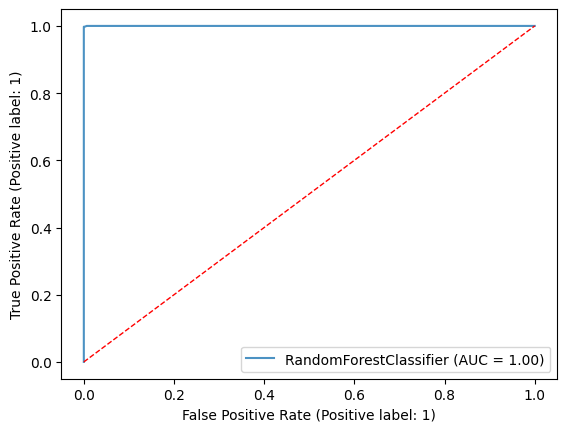

Confusion Matrix for Training data:

[[19822     0]
 [   46 19716]]

Misclassification rate: 0.001162085691188359

Out of Bag error: 0.1324019805982215

Train accuracy: 99.88379143088116


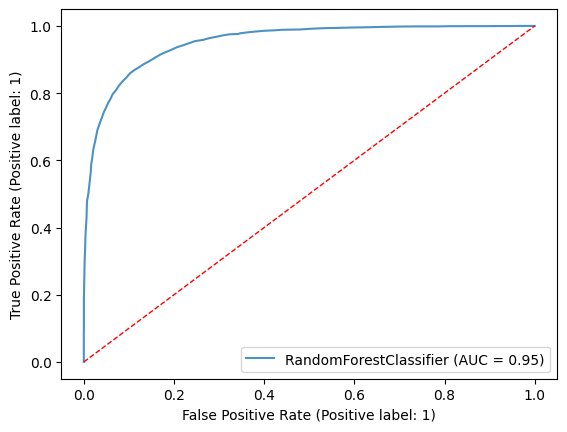

Confusion Matrix for Training data:

[[4321  597]
 [ 617 4361]]

Misclassification rate: 0.12267582861762329

Out of Bag error: 0.1324019805982215

Test error: 87.73241713823768


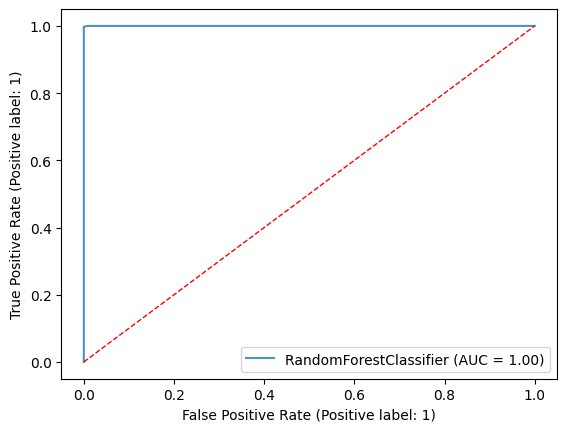

Confusion Matrix for Training data:

[[19839     0]
 [   39 19706]]

Misclassification rate: 0.0009852465642683913

Out of Bag error: 0.12977465642683916

Train accuracy: 99.90147534357317


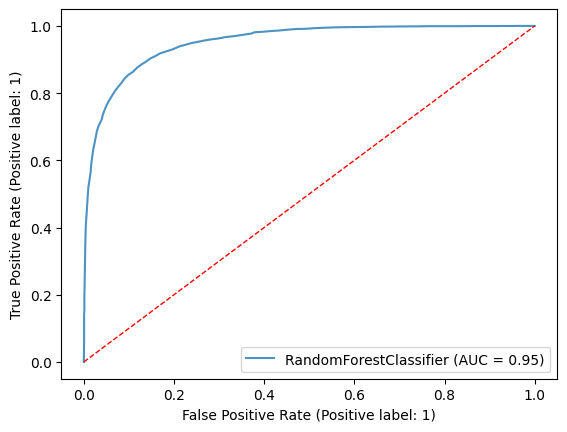

Confusion Matrix for Training data:

[[4323  578]
 [ 622 4373]]

Misclassification rate: 0.12126111560226355

Out of Bag error: 0.12977465642683916

Test error: 87.87388843977365


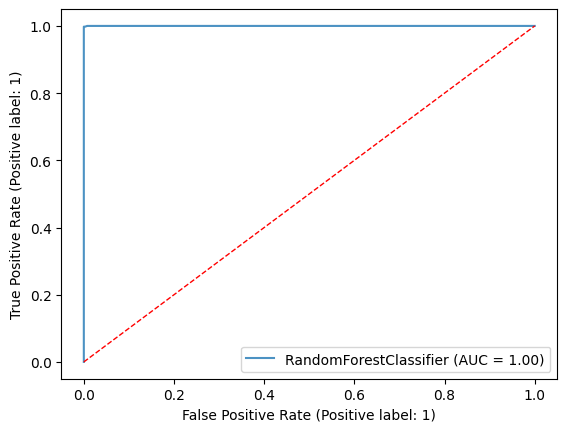

Confusion Matrix for Training data:

[[19777     0]
 [   43 19764]]

Misclassification rate: 0.0010862974939369443

Out of Bag error: 0.12985044462409057

Train accuracy: 99.8913702506063


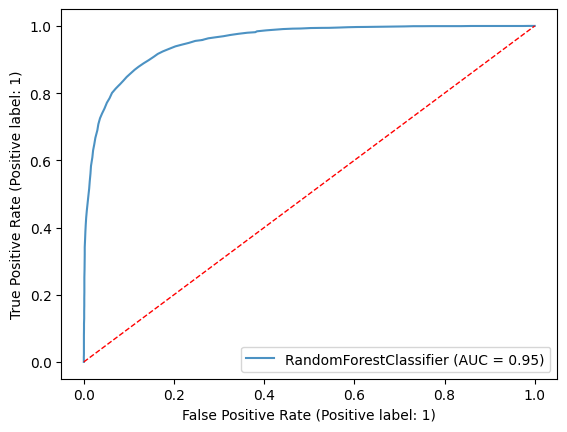

Confusion Matrix for Training data:

[[4361  602]
 [ 600 4333]]

Misclassification rate: 0.12146321746160064

Out of Bag error: 0.12985044462409057

Test error: 87.85367825383995


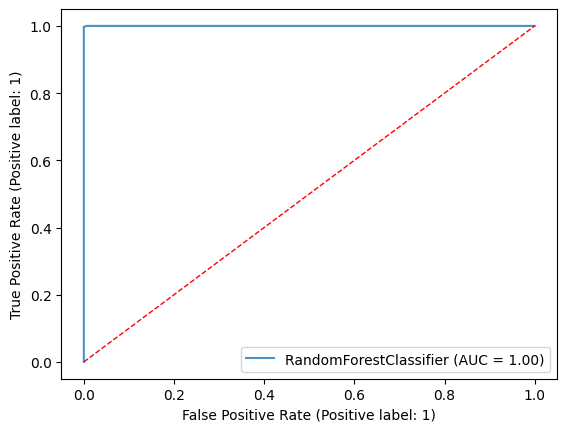

Confusion Matrix for Training data:

[[19709     0]
 [   50 19825]]

Misclassification rate: 0.0012631366208569119

Out of Bag error: 0.12972413096200486

Train accuracy: 99.87368633791431


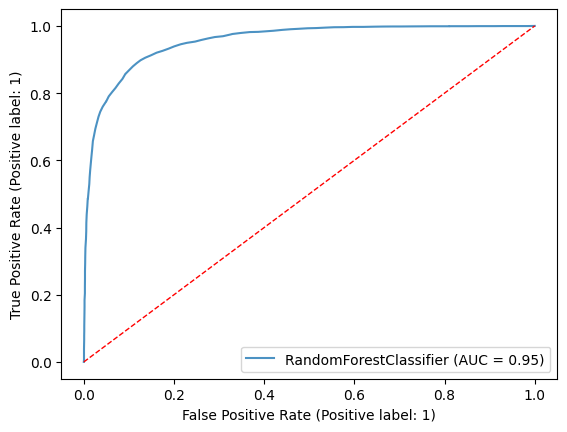

Confusion Matrix for Training data:

[[4440  591]
 [ 538 4327]]

Misclassification rate: 0.11408649959579628

Out of Bag error: 0.12972413096200486

Test error: 88.59135004042037


In [273]:
train_acc, test_acc=[],[]
kf = KFold(n_splits=5, random_state = 2023, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    # RF
    rfc = RandomForestClassifier(n_estimators=100, oob_score = True, n_jobs = -1, random_state = 1996)
    rfc.fit(X_train, y_train)
    #Get prediction for the training dataset 
    y_pred = rfc.predict(X_train)
    # ROC, AUC Plot
    ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train, ax=ax, alpha=0.8)
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
    plt.show()

    # Confusion matrix
    cfm = confusion_matrix(y_train, y_pred)
    tp=cfm[0][0]
    fn=cfm[0][1]
    fp=cfm[1][0]
    tn=cfm[1][1]

    print('Confusion Matrix for Training data:\n')
    print(cfm)

    # Misclassification rate
    rate = (fp+fn)/(tp+tn+fp+fn)
    print('\nMisclassification rate:', rate)

    # Out of Bag error
    print('\nOut of Bag error:', 1-rfc.oob_score_)

    # Test error
    te =rfc.score(X_train, y_train)*100
    train_acc.append(te)
    print('\nTrain accuracy:', te)
    ##Get prediction for the test dataset 
    y_pred = rfc.predict(X_test)

    # ROC, AUC Plot
    ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
    plt.show()

    # Confusion matrix
    cfm = confusion_matrix(y_test, y_pred)
    tp=cfm[0][0]
    fn=cfm[0][1]
    fp=cfm[1][0]
    tn=cfm[1][1]

    print('Confusion Matrix for Training data:\n')
    print(cfm)

    # Misclassification rate
    rate = (fp+fn)/(tp+tn+fp+fn)
    print('\nMisclassification rate:', rate)

    # Out of Bag error
    print('\nOut of Bag error:', 1-rfc.oob_score_)

    ta=rfc.score(X_test, y_test)*100
    test_acc.append(ta)
    # Test error
    print('\nTest error:', ta)


In [220]:
#ncwd, rf,default
print('train:',np.mean(train_acc))
print('test:',np.mean(test_acc))

train: 96.99415588790085
test: 67.18876313662085


In [259]:
#ncwd2, rf,default
print('train:',np.mean(train_acc))
print('test:',np.mean(test_acc))

train: 98.40777418485584
test: 75.56049582322824


In [267]:
#ncwd3, rf,default
print('train:',np.mean(train_acc))
print('test:',np.mean(test_acc))

train: 99.35807396928053
test: 81.22473726758287


In [274]:
#ncwd4, rf,default
print('train:',np.mean(train_acc))
print('test:',np.mean(test_acc))

train: 99.88682295877122
test: 88.0517380759903


In [ ]:
#  model = Sequential([
#       tf.keras.Input(shape=(300,)),
#       Dense(256, activation='relu'),
#       Dense(256, activation='relu'),
#       Dense(256, activation='relu'),
#       Dense(1, activation='linear')
#       ])
#       model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
#       #print(model.summary())
#       # set seed
#       np.random.seed(2023)
#       es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
#       # Fit model
#       history = model.fit(X_train, y_train['RRR_m1'], validation_split=0.2, epochs=100, batch_size=64, verbose=2, callbacks=[es])
#       # predict
#       y_pred = model.predict(X_train)
#       print('Train r-squared: %f' % r2_score(y_train['RRR_m1'], y_pred))

#       y_pred = model.predict(X_test)
#       print('Test r-squared: %f' % r2_score(y_test['RRR_m1'], y_pred))

#       r2scores.append(r2_score(y_test['RRR_m1'], y_pred))

In [113]:
# #Shuffle, then divide it into training and test dataset
# y = ncwd['Location'].values
# X = ncwd.iloc[:, [1,2,3,4,5,6]].values
# #Shuffle
# indices = np.arange(X.shape[0])
# rng = np.random.RandomState(123)
# permuted_indices = rng.permutation(indices)
# #Split - 80(Train) : 20(Test)
# train_size = int(0.8*X.shape[0])
# test_size = X.shape[0] - (train_size)
# print(train_size, test_size)

# train_ind = permuted_indices[:train_size]
# test_ind = permuted_indices[train_size:]

# X_train, y_train = X[train_ind], y[train_ind]
# X_test, y_test = X[test_ind], y[test_ind]

# X_train.shape

# ## No more preprocessing needed such as, scaling and normalization. - else use pipelines form sckitlearn
# ## All features, Genotype, Lightsetting and fpkm shouldn't be modified in anyways since first two are categorical variables
# ## and fpkm values have meanings itself

In [101]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(acc_log)

50.1


In [ ]:
# #Additional Machine Learning Models
# #SVM
# #Takes toooo much time to compile
# svc = SVC()
# svc.fit(X_train, y_train)
# #y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_test, y_test) * 100, 2)
# print(acc_svc)

In [102]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(acc_knn)

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


55.21


In [103]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(acc_random_forest)

67.04


In [225]:
import xgboost as xgb
from xgboost import XGBClassifier

In [249]:
xgb_clf = xgb.XGBClassifier(reg_alpha=0.1, n_estimators = 1000,n_jobs=-1, random_state=0)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)
#0.6854452977634061

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, LeakyReLU, Normalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, classification_report, f1_score, accuracy_score, precision_score,recall_score, confusion_matrix

In [22]:
# set seed
np.random.seed(1996)
# Feature Normalization
embedding_normalizer = Normalization(input_shape=[8,], axis=None)
embedding_normalizer.adapt(X_train)
#Classification model #Best parameter from gridsearch
model = Sequential([
    #embedding_normalizer,
    tf.keras.Input(shape=(8,)),
    Dense(8, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(8, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(4, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(4, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(2, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # sigmoid for binary
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy']) #categorical_accuracy if one hot label
print(model.summary())

2023-10-02 15:27:42.462558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 15:27:42.476015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 dropout_9 (Dropout)         (None, 4)                 0         
                                                                 
 dense_12 (Dense)            (None, 4)                

In [23]:
# set seed
np.random.seed(1996)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
# Fit model 
history = model.fit(X_train,y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=2, callbacks=[es])

Epoch 1/100


2023-10-02 15:27:55.690168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-02 15:28:36.483301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2969/2969 - 48s - loss: 16.2567 - accuracy: 0.4983 - val_loss: 2.4253 - val_accuracy: 0.4971 - 48s/epoch - 16ms/step
Epoch 2/100
2969/2969 - 46s - loss: 2.4545 - accuracy: 0.4990 - val_loss: 0.9604 - val_accuracy: 0.5003 - 46s/epoch - 15ms/step
Epoch 3/100
2969/2969 - 50s - loss: 1.1164 - accuracy: 0.5004 - val_loss: 0.7217 - val_accuracy: 0.5006 - 50s/epoch - 17ms/step
Epoch 4/100
2969/2969 - 44s - loss: 0.8318 - accuracy: 0.5011 - val_loss: 0.6992 - val_accuracy: 0.5006 - 44s/epoch - 15ms/step
Epoch 5/100
2969/2969 - 44s - loss: 0.7450 - accuracy: 0.5018 - val_loss: 0.6984 - val_accuracy: 0.5007 - 44s/epoch - 15ms/step
Epoch 6/100
2969/2969 - 43s - loss: 0.7233 - accuracy: 0.5014 - val_loss: 0.6980 - val_accuracy: 0.5007 - 43s/epoch - 15ms/step
Epoch 7/100
2969/2969 - 42s - loss: 0.7056 - accuracy: 0.5016 - val_loss: 0.6976 - val_accuracy: 0.5007 - 42s/epoch - 14ms/step
Epoch 8/100
2969/2969 - 43s - loss: 0.7016 - accuracy: 0.5015 - val_loss: 0.6972 - val_accuracy: 0.5007 - 43s/epoch

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("Train dataset %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Train dataset %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))